In [1]:
%load_ext autoreload
%autoreload 2

# For Stack

Generate mock responses

In [2]:
from s1_frame_enumerator import S1Frame, query_slc_metadata_over_frame, format_results_for_sent1_stack, frames2gdf
import json
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
def generate_mock_data(frame_id):
    frame = S1Frame(frame_id)
    result = query_slc_metadata_over_frame(frame)
    out_path = f'frame_{frame_id}_asf_results.json'
    json.dump(result, open(out_path, 'w'))
    return out_path

In [26]:
# generate_mock_data(13403)
# generate_mock_data(13404)
# generate_mock_data(9847)
# generate_mock_data(9848)

'frame_9848_asf_results.json'

## Coverage Tests

In [5]:
frame_0 = S1Frame(9847)
frame_1 = S1Frame(9848)
frame_2 = S1Frame(9849)

frames = [frame_0, frame_1, frame_2]

In [6]:
df_frames = frames2gdf(frames)
df_frames_extents = frames2gdf(frames, use_footprint_geometry=True)

### NOTE: We are only using a response from 2 of the 3 Frames for illustration

In [7]:
resp_test_0 = query_slc_metadata_over_frame(frame_0, start_time='2021-09-14', stop_time='2021-09-16')
resp_test_1 = query_slc_metadata_over_frame(frame_1, start_time='2021-09-14', stop_time='2021-09-16')
resp = resp_test_0 + resp_test_1

In [8]:
out_path = 'CA-subset_2021-09-14_asf_results.json'
json.dump(resp, open(out_path, 'w'))

In [9]:
df_resp = format_results_for_sent1_stack(resp)
df_resp.head()

,slc_id,start_time,stop_time,url,track_number,polarization,orbit,beam_mode,size_gb,flight_direction,stack_repeat_pass_id,repeat_pass_timestamp,geometry
0,S1A_IW_SLC__1SDV_20210915T015012_20210915T0150...,2021-09-15 01:50:12.165000+00:00,2021-09-15 01:50:41.995000+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,64,VV+VH,39686,IW,4.664399,ASCENDING,0,2021-09-15 00:00:00+00:00,"POLYGON ((-118.83274 33.98350, -118.41847 32.1..."
1,S1A_IW_SLC__1SDV_20210915T015039_20210915T0151...,2021-09-15 01:50:39.756000+00:00,2021-09-15 01:51:07.648000+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,64,VV+VH,39686,IW,4.418194,ASCENDING,0,2021-09-15 00:00:00+00:00,"POLYGON ((-119.19943 35.52710, -118.80479 33.8..."


/var/folders/0p/d5x2m4tx5kg1246bplsvyfyh0000gq/T/ipykernel_51571/1224061627.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


(31.21359933194077, 36.70334208606267)

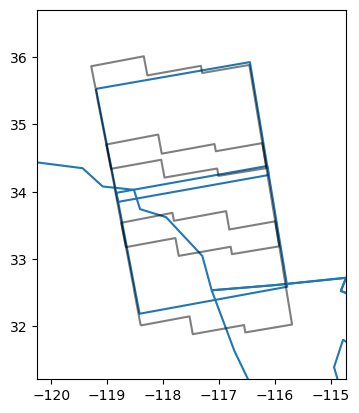

In [10]:
fig, ax = plt.subplots()
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_world.boundary.plot(ax=ax)
df_resp.boundary.plot(ax=ax)
#df_frames.boundary.plot(ax=ax, alpha=.25)
df_frames_extents.boundary.plot(ax=ax, alpha=.5, color='black')

xmin, ymin, xmax, ymax = df_frames.total_bounds
ax.set_xlim(xmin - 1, xmax + 1)
ax.set_ylim(ymin - 1, ymax + 1)

In [11]:
from s1_frame_enumerator.s1_stack import filter_s1_stack_by_geometric_coverage_per_frame, filter_s1_stack_by_geometric_coverage_per_pass

In [12]:
filter_s1_stack_by_geometric_coverage_per_frame(df_resp, frames, minimum_coverage_ratio_per_frame=.7)

,slc_id,start_time,stop_time,url,track_number,polarization,orbit,beam_mode,size_gb,flight_direction,stack_repeat_pass_id,repeat_pass_timestamp,geometry
0,S1A_IW_SLC__1SDV_20210915T015012_20210915T0150...,2021-09-15 01:50:12.165000+00:00,2021-09-15 01:50:41.995000+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,64,VV+VH,39686,IW,4.664399,ASCENDING,0,2021-09-15 00:00:00+00:00,"POLYGON ((-118.83274 33.98350, -118.41847 32.1..."
1,S1A_IW_SLC__1SDV_20210915T015039_20210915T0151...,2021-09-15 01:50:39.756000+00:00,2021-09-15 01:51:07.648000+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,64,VV+VH,39686,IW,4.418194,ASCENDING,0,2021-09-15 00:00:00+00:00,"POLYGON ((-119.19943 35.52710, -118.80479 33.8..."


In [13]:
filter_s1_stack_by_geometric_coverage_per_pass(df_resp, frames, minimum_coverage_per_pass_ratio=.8)

,slc_id,start_time,stop_time,url,track_number,polarization,orbit,beam_mode,size_gb,flight_direction,stack_repeat_pass_id,repeat_pass_timestamp,geometry
0,S1A_IW_SLC__1SDV_20210915T015012_20210915T0150...,2021-09-15 01:50:12.165000+00:00,2021-09-15 01:50:41.995000+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,64,VV+VH,39686,IW,4.664399,ASCENDING,0,2021-09-15 00:00:00+00:00,"POLYGON ((-118.83274 33.98350, -118.41847 32.1..."
1,S1A_IW_SLC__1SDV_20210915T015039_20210915T0151...,2021-09-15 01:50:39.756000+00:00,2021-09-15 01:51:07.648000+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,64,VV+VH,39686,IW,4.418194,ASCENDING,0,2021-09-15 00:00:00+00:00,"POLYGON ((-119.19943 35.52710, -118.80479 33.8..."


In [14]:
pass_geometry = df_resp.geometry.unary_union
ratio_frame_int = [pass_geometry.intersection(f.footprint_geometry).area / f.footprint_geometry.area for f in frames]
ratio_frame_int

[0.7539624108151928, 0.9953821190274593, 0.9042819450896814]

In [15]:
frame_union = df_frames.geometry.unary_union
int_geo = (frame_union).intersection(df_resp.geometry.unary_union)
pass_ratio = int_geo.area / frame_union.area
pass_ratio

0.9357051337271376

# For Enumeration

Generate Small Stack

In [16]:
from shapely.geometry import Point
import geopandas as gpd
from rasterio.crs import CRS
from s1_frame_enumerator import get_overlapping_s1_frames, get_s1_stack
import pandas as pd

aoi_geo = Point(-120, 35).buffer(.5)
df_aoi = gpd.GeoDataFrame(geometry=[aoi_geo], crs=CRS.from_epsg(4326))

In [17]:
frames = get_overlapping_s1_frames(aoi_geo, track_numbers=[137])
len(frames)

2

In [18]:
for frame in frames:
    print(frame.frame_id)

21248
21249


In [19]:
df_stack = get_s1_stack(frames)
df_stack.head()

,slc_id,start_time,stop_time,url,track_number,polarization,orbit,beam_mode,size_gb,flight_direction,stack_repeat_pass_id,repeat_pass_timestamp,geometry
0,S1A_IW_SLC__1SSV_20150507T015751_20150507T0158...,2015-05-07 01:57:51+00:00,2015-05-07 01:58:21+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,137,VV,5809,IW,2.652423,ASCENDING,5,2015-05-07 00:00:00+00:00,"POLYGON ((-121.02775 34.52478, -120.61049 32.7..."
1,S1A_IW_SLC__1SSV_20150507T015818_20150507T0158...,2015-05-07 01:58:18+00:00,2015-05-07 01:58:45+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,137,VV,5809,IW,2.437214,ASCENDING,5,2015-05-07 00:00:00+00:00,"POLYGON ((-121.37492 36.01932, -120.98943 34.3..."
2,S1A_IW_SLC__1SSV_20150507T015843_20150507T0159...,2015-05-07 01:58:43+00:00,2015-05-07 01:59:11+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,137,VV,5809,IW,2.568650,ASCENDING,5,2015-05-07 00:00:00+00:00,"POLYGON ((-121.74913 37.56177, -121.34393 35.8..."
3,S1A_IW_SLC__1SSV_20150531T015747_20150531T0158...,2015-05-31 01:57:47+00:00,2015-05-31 01:58:15+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,137,VV,6159,IW,2.202462,ASCENDING,6,2015-05-31 00:00:00+00:00,"POLYGON ((-120.92996 34.07332, -120.54167 32.3..."
4,S1A_IW_SLC__1SSV_20150531T015813_20150531T0158...,2015-05-31 01:58:13+00:00,2015-05-31 01:58:40+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,137,VV,6159,IW,2.374284,ASCENDING,6,2015-05-31 00:00:00+00:00,"POLYGON ((-121.27898 35.56881, -120.89700 33.9..."


In [20]:
df_stack.repeat_pass_timestamp[0].tz

datetime.timezone.utc

In [34]:
df_stack

,slc_id,start_time,stop_time,url,track_number,polarization,orbit,beam_mode,size_gb,flight_direction,stack_repeat_pass_id,repeat_pass_timestamp,geometry
0,S1A_IW_SLC__1SSV_20150507T015751_20150507T0158...,2015-05-07 01:57:51+00:00,2015-05-07 01:58:21+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,137,VV,5809,IW,2.652423,ASCENDING,5,2015-05-07 00:00:00+00:00,"POLYGON ((-121.02775 34.52478, -120.61049 32.7..."
1,S1A_IW_SLC__1SSV_20150507T015818_20150507T0158...,2015-05-07 01:58:18+00:00,2015-05-07 01:58:45+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,137,VV,5809,IW,2.437214,ASCENDING,5,2015-05-07 00:00:00+00:00,"POLYGON ((-121.37492 36.01932, -120.98943 34.3..."
2,S1A_IW_SLC__1SSV_20150507T015843_20150507T0159...,2015-05-07 01:58:43+00:00,2015-05-07 01:59:11+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,137,VV,5809,IW,2.568650,ASCENDING,5,2015-05-07 00:00:00+00:00,"POLYGON ((-121.74913 37.56177, -121.34393 35.8..."
3,S1A_IW_SLC__1SSV_20150531T015747_20150531T0158...,2015-05-31 01:57:47+00:00,2015-05-31 01:58:15+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,137,VV,6159,IW,2.202462,ASCENDING,6,2015-05-31 00:00:00+00:00,"POLYGON ((-120.92996 34.07332, -120.54167 32.3..."
4,S1A_IW_SLC__1SSV_20150531T015813_20150531T0158...,2015-05-31 01:58:13+00:00,2015-05-31 01:58:40+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,137,VV,6159,IW,2.374284,ASCENDING,6,2015-05-31 00:00:00+00:00,"POLYGON ((-121.27898 35.56881, -120.89700 33.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,S1A_IW_SLC__1SDV_20240401T015854_20240401T0159...,2024-04-01 01:58:54.233000+00:00,2024-04-01 01:59:22.141000+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,137,VV+VH,53234,IW,8.434430,ASCENDING,410,2024-04-01 00:00:00+00:00,"POLYGON ((-121.14350 35.07445, -120.75091 33.3..."
998,S1A_IW_SLC__1SDV_20240401T015920_20240401T0159...,2024-04-01 01:59:20.003000+00:00,2024-04-01 01:59:46.972000+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,137,VV+VH,53234,IW,8.160678,ASCENDING,410,2024-04-01 00:00:00+00:00,"POLYGON ((-121.50642 36.56752, -121.11974 34.9..."
999,S1A_IW_SLC__1SDV_20240413T015825_20240413T0158...,2024-04-13 01:58:25.273000+00:00,2024-04-13 01:58:55.126000+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,137,VV+VH,53409,IW,9.064767,ASCENDING,411,2024-04-13 00:00:00+00:00,"POLYGON ((-120.79239 33.52797, -120.37955 31.7..."
1000,S1A_IW_SLC__1SDV_20240413T015852_20240413T0159...,2024-04-13 01:58:52.867000+00:00,2024-04-13 01:59:20.769000+00:00,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,137,VV+VH,53409,IW,8.434273,ASCENDING,411,2024-04-13 00:00:00+00:00,"POLYGON ((-121.13586 35.07453, -120.74338 33.3..."


In [39]:
df_stack.shape

(1002, 13)

In [43]:
df_stack_one_pass = df_stack.dissolve(by='stack_repeat_pass_id', aggfunc={'start_time': 'min'}, as_index=False)
df_stack_one_pass
df_stack_one_pass.explode(index_parts=False).shape

(353, 3)

In [21]:
import datetime

x = pd.to_datetime(df_stack.repeat_pass_timestamp)
cond_0 = x > pd.Timestamp('2022-9-1', tz='UTC')
cond_1 = x < pd.Timestamp('2023-1-1', tz='UTC')

df_stack_subset = df_stack[cond_0 & cond_1].reset_index(drop=True)
df_stack_subset.shape

(30, 13)

In [22]:
df_stack_subset.to_file('sample_stack_137.geojson', driver='GeoJSON')

In [23]:
dates = df_stack_subset.repeat_pass_timestamp.unique().tolist()
dates

[Timestamp('2022-09-03 00:00:00+0000', tz='UTC'),
 Timestamp('2022-09-15 00:00:00+0000', tz='UTC'),
 Timestamp('2022-09-27 00:00:00+0000', tz='UTC'),
 Timestamp('2022-10-09 00:00:00+0000', tz='UTC'),
 Timestamp('2022-10-21 00:00:00+0000', tz='UTC'),
 Timestamp('2022-11-02 00:00:00+0000', tz='UTC'),
 Timestamp('2022-11-14 00:00:00+0000', tz='UTC'),
 Timestamp('2022-11-26 00:00:00+0000', tz='UTC'),
 Timestamp('2022-12-08 00:00:00+0000', tz='UTC'),
 Timestamp('2022-12-20 00:00:00+0000', tz='UTC')]

In [24]:
from s1_frame_enumerator.ifg_enum import select_ifg_pair_from_stack
frames = [S1Frame(21248), S1Frame(21249)]

ref_date = pd.Timestamp('2022-12-20', tz='UTC')
sec_date = pd.Timestamp('2022-12-8', tz='UTC')

select_ifg_pair_from_stack(ref_date, sec_date, df_stack_subset, None)

{'reference': ['S1A_IW_SLC__1SDV_20221220T015822_20221220T015852_046409_058F3D_D201',
  'S1A_IW_SLC__1SDV_20221220T015850_20221220T015918_046409_058F3D_2768',
  'S1A_IW_SLC__1SDV_20221220T015916_20221220T015943_046409_058F3D_8C7E'],
 'secondary': ['S1A_IW_SLC__1SDV_20221208T015823_20221208T015853_046234_058941_FEE4',
  'S1A_IW_SLC__1SDV_20221208T015851_20221208T015919_046234_058941_A19D',
  'S1A_IW_SLC__1SDV_20221208T015917_20221208T015944_046234_058941_52CD'],
 'reference_date': Timestamp('2022-12-20 00:00:00+0000', tz='UTC'),
 'secondary_date': Timestamp('2022-12-08 00:00:00+0000', tz='UTC'),
 'frame_id': None,
 'geometry': <POLYGON ((-120.798 33.527, -120.782 33.53, -120.782 33.53, -120.781 33.53, ...>}

In [25]:
from s1_frame_enumerator.ifg_enum import select_ifg_pair_from_stack
frames = [S1Frame(21248), S1Frame(21249)]

ref_date = pd.Timestamp('2022-12-20', tz='UTC')
sec_date = pd.Timestamp('2022-12-8', tz='UTC')

select_ifg_pair_from_stack(ref_date, sec_date, df_stack_subset, frames)

AttributeError: 'list' object has no attribute 'frame_geometry'